<a href="https://colab.research.google.com/github/sevvalbicerr/GlobalAIHub--FinalProject/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

In [2]:
X_train = np.load('/content/drive/MyDrive/DeepLearningBootcamp/Dataset/data/X_train.npy')
X_test = np.load('/content/drive/MyDrive/DeepLearningBootcamp/Dataset/data/X_test.npy')
X_val = np.load('/content/drive/MyDrive/DeepLearningBootcamp/Dataset/data/X_val.npy')

y_train = np.load('/content/drive/MyDrive/DeepLearningBootcamp/Dataset/data/y_train.npy')
y_test = np.load('/content/drive/MyDrive/DeepLearningBootcamp/Dataset/data/y_test.npy')
y_val = np.load('/content/drive/MyDrive/DeepLearningBootcamp/Dataset/data/y_val.npy')

In [3]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"X_val: {len(X_val)}")

print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")
print(f"y_val: {len(y_val)}")

X_train: 6985
X_test: 873
X_val: 874
y_train: 6985
y_test: 873
y_val: 874


In [4]:
# Import TensorFlow
import tensorflow as tf

In [ ]:
# Create a model object
model = tf.keras.Sequential()

In [ ]:

model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu", input_shape = X_train.shape[1:] ))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [ ]:
Model_Results = model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_data = (X_val,y_val))

Epoch 1/20
110/110 [==============================] - 17s 40ms/step - loss: 2.6947 - accuracy: 0.1652 - val_loss: 2.1223 - val_accuracy: 0.2677
Epoch 2/20
110/110 [==============================] - 4s 33ms/step - loss: 2.1186 - accuracy: 0.1937 - val_loss: 1.8678 - val_accuracy: 0.3867
Epoch 3/20
110/110 [==============================] - 4s 34ms/step - loss: 1.9202 - accuracy: 0.2896 - val_loss: 1.5246 - val_accuracy: 0.5172
Epoch 4/20
110/110 [==============================] - 4s 33ms/step - loss: 1.7193 - accuracy: 0.3689 - val_loss: 1.3180 - val_accuracy: 0.5835
Epoch 5/20
110/110 [==============================] - 4s 33ms/step - loss: 1.5398 - accuracy: 0.4438 - val_loss: 1.1217 - val_accuracy: 0.6682
Epoch 6/20
110/110 [==============================] - 4s 34ms/step - loss: 1.3555 - accuracy: 0.5141 - val_loss: 0.9911 - val_accuracy: 0.7128
Epoch 7/20
110/110 [==============================] - 4s 33ms/step - loss: 1.2021 - accuracy: 0.5732 - val_loss: 0.8323 - val_accuracy: 0.778

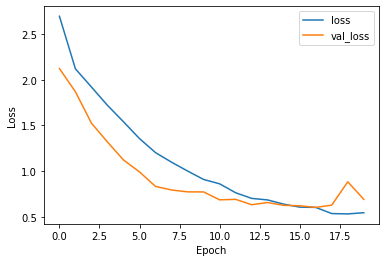

In [ ]:
plt.plot(Model_Results.history["loss"], label = "loss")
plt.plot(Model_Results.history["val_loss"], label = "val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

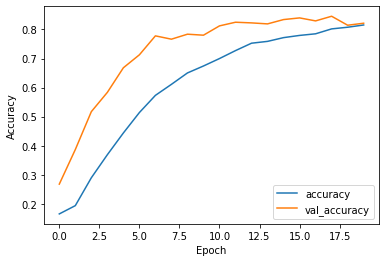

In [ ]:
plt.plot(Model_Results.history["accuracy"], label = "accuracy")

plt.plot(Model_Results.history["val_accuracy"], label = "val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 8ms/step - loss: 0.6600 - accuracy: 0.8305


[0.6600483655929565, 0.8304696679115295]

In [8]:
model2 = tf.keras.Sequential()

In [9]:
model2.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu", input_shape = X_train.shape[1:] ))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))


model2.add(tf.keras.layers.MaxPooling2D(2, 2))


model2.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))


model2.add(tf.keras.layers.MaxPooling2D(2, 2))


model2.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model2.add(tf.keras.layers.MaxPooling2D(2, 2))

model2.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model2.add(tf.keras.layers.MaxPooling2D(2, 2))

model2.add(tf.keras.layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(64, activation = "relu"))
model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(64, activation = "relu"))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation = "softmax"))
model2.compile(optimizer = "RMSprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [10]:
Model2_Results = model2.fit(X_train, y_train, batch_size = 128, epochs = 30, validation_data = (X_val,y_val))

Epoch 1/30
55/55 [==============================] - 17s 106ms/step - loss: 2.1501 - accuracy: 0.2100 - val_loss: 2.0823 - val_accuracy: 0.3627
Epoch 2/30
55/55 [==============================] - 4s 76ms/step - loss: 1.8170 - accuracy: 0.3366 - val_loss: 1.3294 - val_accuracy: 0.5446
Epoch 3/30
55/55 [==============================] - 4s 76ms/step - loss: 1.5895 - accuracy: 0.4324 - val_loss: 0.9953 - val_accuracy: 0.6716
Epoch 4/30
55/55 [==============================] - 4s 77ms/step - loss: 1.3616 - accuracy: 0.5220 - val_loss: 0.8651 - val_accuracy: 0.7128
Epoch 5/30
55/55 [==============================] - 4s 77ms/step - loss: 1.1986 - accuracy: 0.5881 - val_loss: 0.7079 - val_accuracy: 0.7620
Epoch 6/30
55/55 [==============================] - 4s 77ms/step - loss: 1.0705 - accuracy: 0.6371 - val_loss: 0.7178 - val_accuracy: 0.7677
Epoch 7/30
55/55 [==============================] - 4s 77ms/step - loss: 0.9196 - accuracy: 0.6921 - val_loss: 0.7217 - val_accuracy: 0.8089
Epoch 8/30


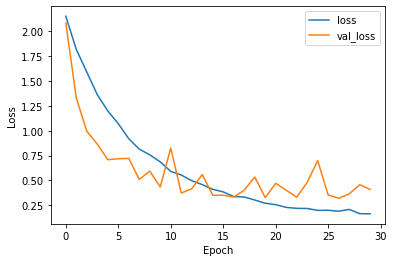

In [11]:
plt.plot(Model2_Results.history["loss"], label = "loss")
plt.plot(Model2_Results.history["val_loss"], label = "val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

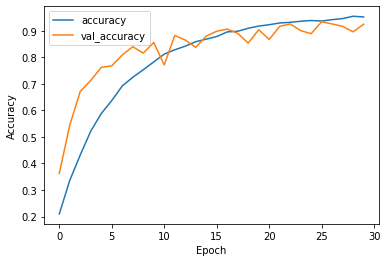

In [12]:
plt.plot(Model2_Results.history["accuracy"], label = "accuracy")

plt.plot(Model2_Results.history["val_accuracy"], label = "val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [13]:
model2.evaluate(X_test, y_test)

28/28 [==============================] - 1s 13ms/step - loss: 0.3379 - accuracy: 0.9255


[0.3378712832927704, 0.9255440831184387]